# Activation Functions


### Step Function
    - Returns either a 0 or 1

### Sigmoid Function
- $y = \dfrac{1}{1+e^-x}$
- The max value is 1 and min value is 0
- If x is high, the value is approx 1
- If x is small, the value is approx 0
- Does not return negative numbers

### Hyperbolic Tangent Function
- $Y = \dfrac{e^x-e^x}{e^x-e^x}$
- Returns negative and postive values
- Returns values between -1 and 1

### ReLu Function
- $ReLu(x) = max(x,0)$
- Given an element $x$, the function is defined as the maximum of that element and 0
- When the input is negative, the derivative of the ReLu function is 0, and when the input is positive the derivative of the ReLu function is 1. 

In [10]:
import numpy as np

In [11]:
# Sigmoid Function
def sigmoid(sum):
    return 1/(1+np.exp(-sum))

## XOR Truth Table

| **A** | **B** | **Output** |
|:-----:|:-----:|:----------:|
|   0   |   0   |     0      |
|   0   |   1   |     1      |
|   1   |   0   |     1      |
|   1   |   1   |     0      |


# Multi Layer Perceptron Example Calculations
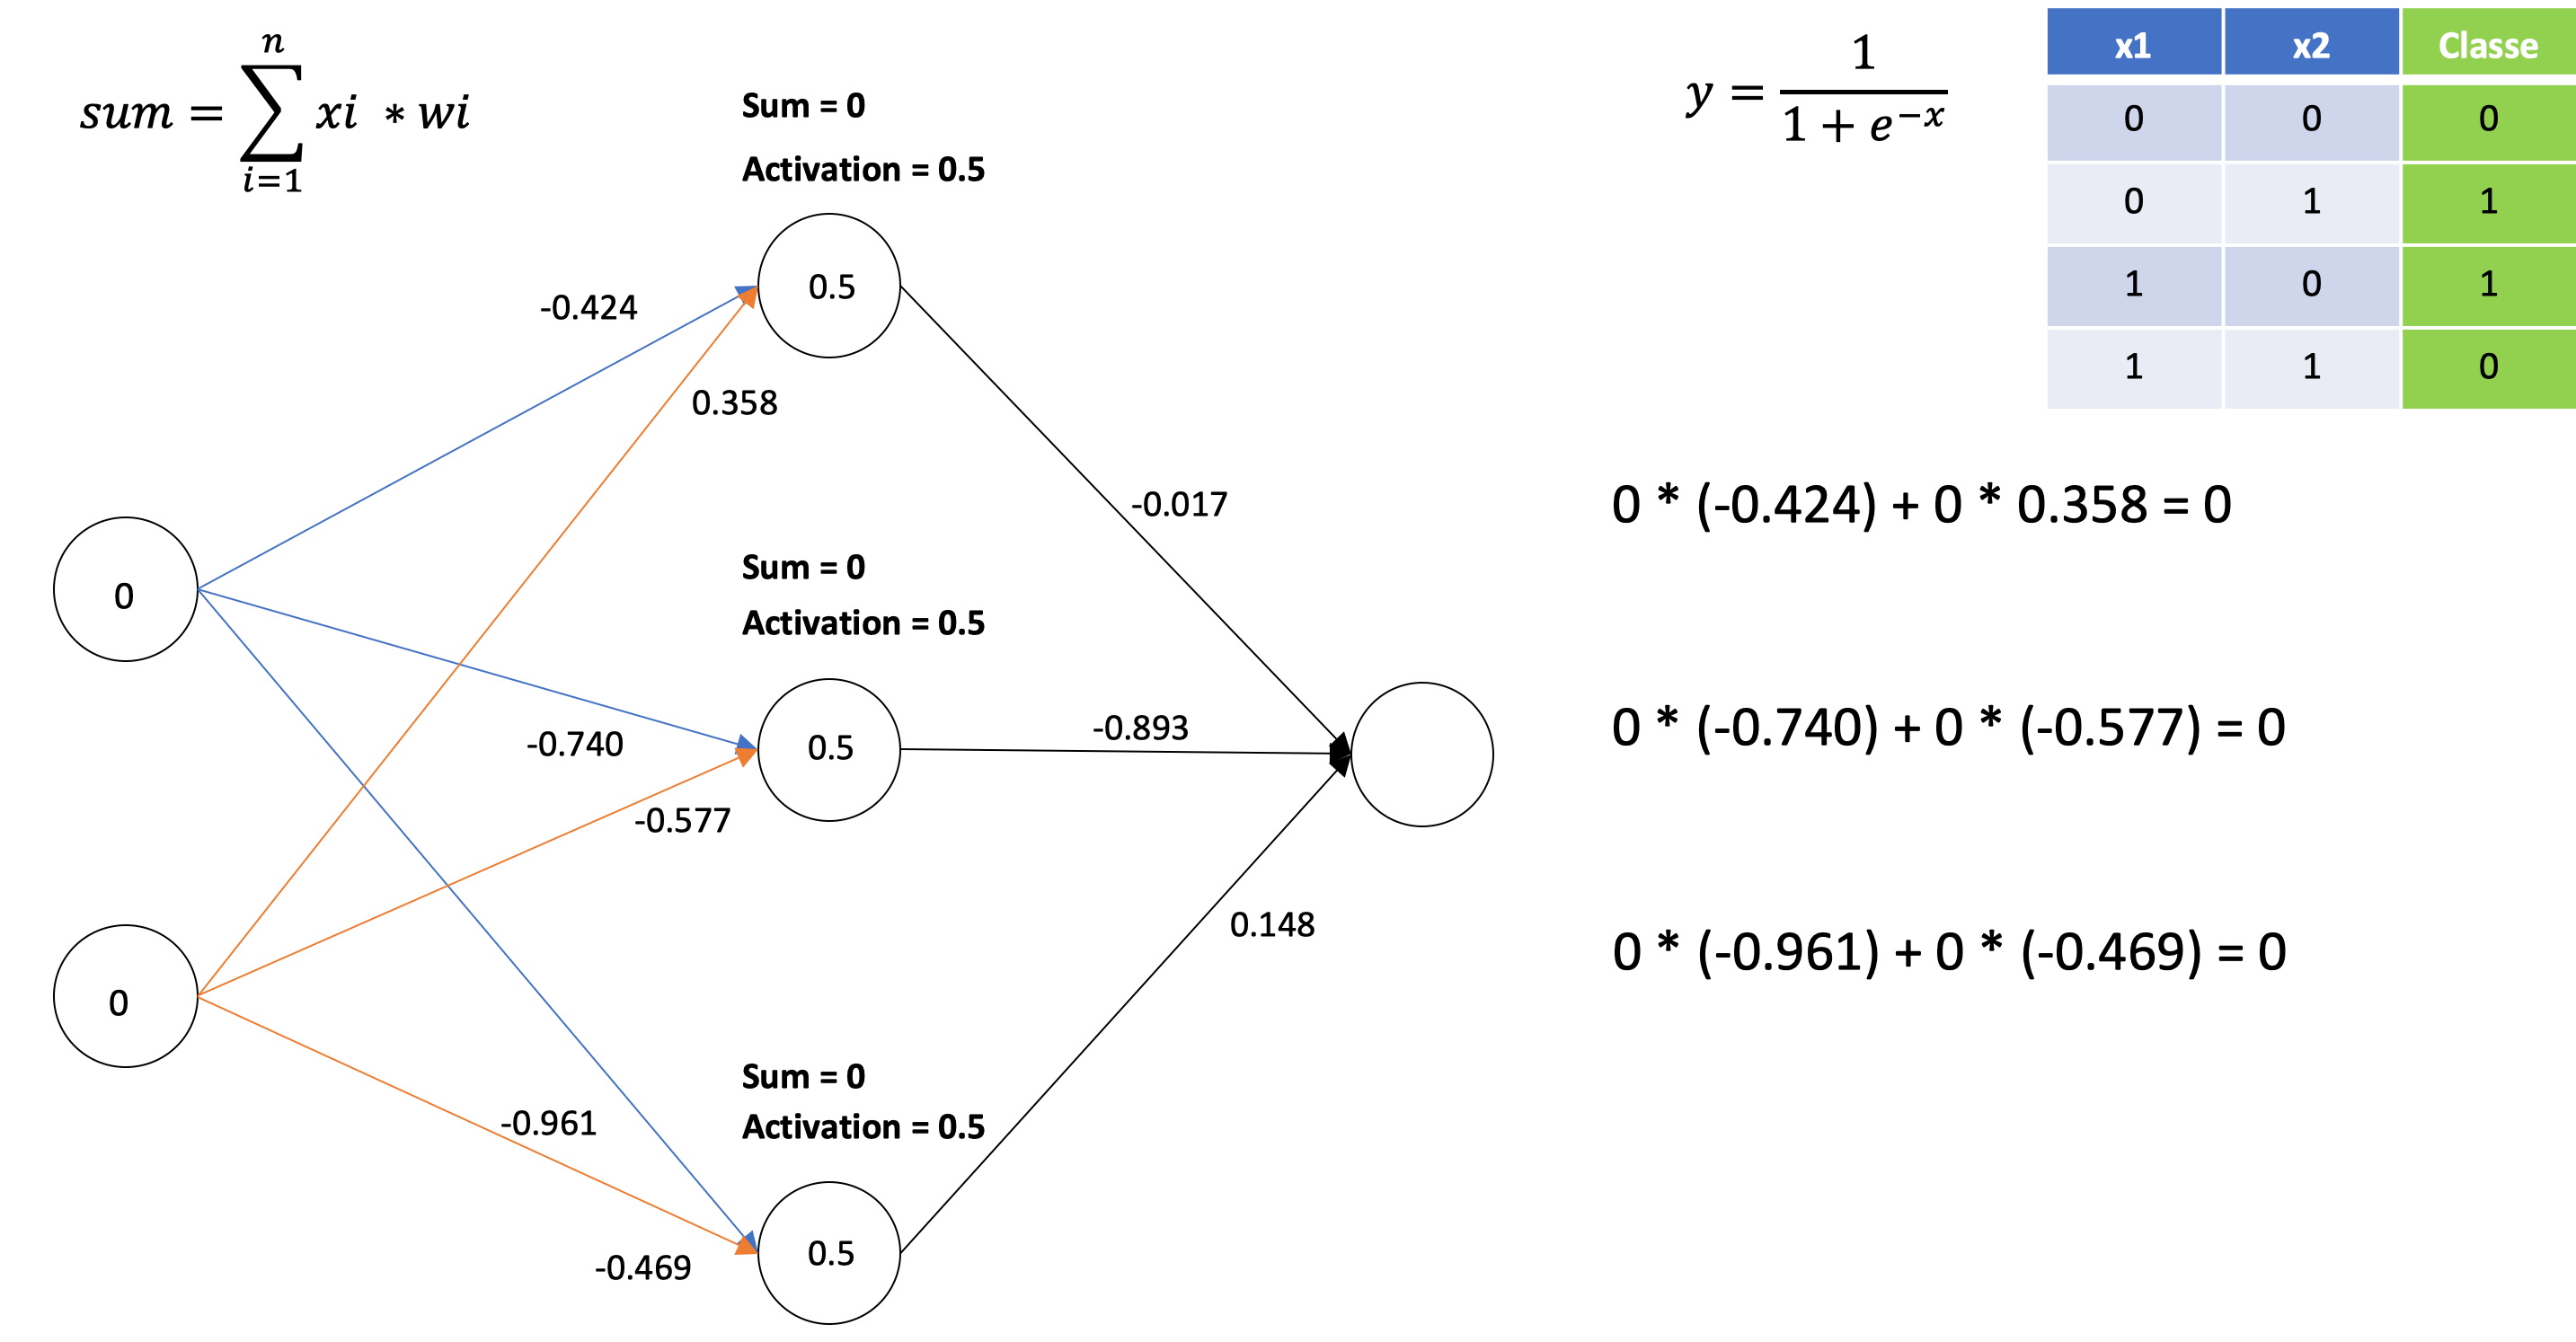

### Coding XOR Gate

In [14]:
inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
print(inputs.shape)
outputs = np.array([[0], [1], [1], [0]])
print(outputs.shape)
input_weights = np.array([[-0.424, -0.740, -0.961], [0.358, -0.577, -0.469]])
output_weights = np.array([[-0.017], [-0.893], [0.148]])
lr = 0.3
epochs = 100

(4, 2)
(4, 1)


### Input layer --> Hidden Layer --> Ouput Layer

In [24]:
def feed_foward(epochs, inputs, input_weights, output_weights):
    for _ in range(epochs):
        sum_synapse0 = np.dot(inputs, input_weights)
        hidden_layer = sigmoid(sum_synapse0)
        hidden_ouput = np.dot(hidden_layer, output_weights)
        output_layer = sigmoid(hidden_ouput)
    return output_layer
    

In [31]:
input_layer = inputs
sum_synapse0 = np.dot(input_layer, input_weights)
hidden_layer = sigmoid(sum_synapse0)
hidden_ouput = np.dot(hidden_layer,output_weights)
ouput_layer = sigmoid(hidden_ouput)
ouput_layer
error_output_layer = outputs - ouput_layer
error_output_layer
avg_error = np.mean(abs(error_output_layer))
avg_error


0.49880848923713045

### Partial Derivative

In [38]:
def sigmoid_derivative(sigmoid_input):
    # y * (1-y)
    return sigmoid_input * (1- sigmoid_input)


0.240975

In [40]:
derivative_output = sigmoid_derivative(ouput_layer)
derivative_output

array([[0.2411425 ],
       [0.24535947],
       [0.24600391],
       [0.24823702]])

### Delta for Ouput
- $delta_{output} = error * sigmoid_{derivative}$

In [44]:
delta_output = error_output_layer * derivative_output
delta_output

array([[-0.0978763 ],
       [ 0.13939397],
       [ 0.138553  ],
       [-0.11369557]])

### Hidden Layer --> Delta
- This tells us the direction when updating the weights
- $Delta_{derivative} = sigmoid_{derivative} * weights.T * delta_{output}$
- $simoid_{derivative} = sigmoid_derivative({hidden_layer})$

In [57]:
delta_output_x_weight = (delta_output.dot(weights1.T))
print(delta_output_x_weight)


[[ 0.0016639   0.08740354 -0.01448569]
 [-0.0023697  -0.12447882  0.02063031]
 [-0.0023554  -0.12372783  0.02050584]
 [ 0.00193282  0.10153015 -0.01682694]]


### Gradient Descent

In [58]:
delta_hidden_layer = delta_output_x_weight * sigmoid_derivative(hidden_layer)
delta_hidden_layer

array([[ 0.00041597,  0.02185088, -0.00362142],
       [-0.00057384, -0.02866677,  0.00488404],
       [-0.00056316, -0.02705587,  0.00410378],
       [ 0.00048268,  0.01692128, -0.00262183]])

### Backpropagation
- $weight_{n+1} = weight_{n} + (input * delta * learning rate)$
- $ input * delta = gradient descent$
- 

In [64]:
hidden_layerT = hidden_layer.T
hidden_layerT

array([[0.5       , 0.5885562 , 0.39555998, 0.48350599],
       [0.5       , 0.35962319, 0.32300414, 0.21131785],
       [0.5       , 0.38485296, 0.27667802, 0.19309868]])

In [62]:
delta_output

array([[-0.0978763 ],
       [ 0.13939397],
       [ 0.138553  ],
       [-0.11369557]])

In [65]:
input_x_delta1 = hidden_layerT.dot(delta_output)
input_x_delta1

array([[0.03293657],
       [0.02191844],
       [0.02108814]])

In [66]:
weights1 = weights1 + (input_x_delta1 * lr)
weights1

array([[-0.00711903],
       [-0.88642447],
       [ 0.15432644]])

### Weight Update - Hidden Layer to Input Layer

In [67]:
input_layer

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [68]:
delta_hidden_layer

array([[ 0.00041597,  0.02185088, -0.00362142],
       [-0.00057384, -0.02866677,  0.00488404],
       [-0.00056316, -0.02705587,  0.00410378],
       [ 0.00048268,  0.01692128, -0.00262183]])

In [69]:
input_layerT = input_layer.T
input_layerT

array([[0, 0, 1, 1],
       [0, 1, 0, 1]])

In [70]:
input_layer_delta0 = input_layerT.dot(delta_hidden_layer)
input_layer_delta0

array([[-8.04778516e-05, -1.01345901e-02,  1.48194623e-03],
       [-9.11603819e-05, -1.17454886e-02,  2.26221011e-03]])

In [71]:
weights0 =weights0 + (input_layer_delta0 * lr)
weights0

array([[-0.42402414, -0.74304038, -0.96055542],
       [ 0.35797265, -0.58052365, -0.46832134]])

### Complete NN

In [72]:
epochs = 100000
learning_rate = 0.6
error = []

for epoch in range(epochs):
    # input layer
    input_layer = inputs
    # intial calculation
    sum_synapse0 = np.dot(input_layer, weights0)
    # matrix multiplication * activation function
    hidden_layer = sigmoid(sum_synapse0)
    # hidden layer --> weights
    sum_synapse1 = np.dot(hidden_layer, weights1)
    # outer layer with activation function
    output_layer = sigmoid(sum_synapse1)
    # calculating error rate actual - prediction
    error_output_layer = outputs - output_layer
    # mean average rate 
    average = np.mean(abs(error_output_layer))
    if epoch % 10000 == 0:
        print("Epoch: " + str(epoch + 1) + " Error: " + str(average))
        error.append(average)
    # partial derivative
    derivative_output = sigmoid_derivative(output_layer)
    # partial derivative * error rate
    delta_output = error_output_layer * derivative_output
    # transposing weights
    weights1T = weights1.T
    # 
    delta_output_weight = delta_output.dot(weights1T)
    delta_hidden_layer = delta_output_weight * sigmoid_derivative(hidden_layer)

    hidden_layerT = hidden_layer.T
    input_x_delta1 = hidden_layerT.dot(delta_output)
    weights1 = weights1 + (input_x_delta1 * learning_rate)

    input_layerT = input_layer.T
    input_x_delta0 = input_layerT.dot(delta_hidden_layer)
    weights0 = weights0 + (input_x_delta0 * learning_rate)

Epoch: 1 Error: 0.4988031531446352
Epoch: 10001 Error: 0.1444115306484827
Epoch: 20001 Error: 0.13819030242156952
Epoch: 30001 Error: 0.13561521264601034
Epoch: 40001 Error: 0.1341237531142977
Epoch: 50001 Error: 0.1331251600443038
Epoch: 60001 Error: 0.13240141289994298
Epoch: 70001 Error: 0.13185456073845547
Epoch: 80001 Error: 0.13144790231084516
Epoch: 90001 Error: 0.13138892839645747


In [77]:
def calculate_output(instance):
    hidden_layer = sigmoid(np.dot(instance,weights0))
    ouput_layer = sigmoid(np.dot(hidden_layer,weights1))
    return output_layer[0]

In [78]:
calculate_output(np.array([0,0]))

array([0.04918135])